In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [117]:
# df=pd.read_excel('standing_appdata.xlsx')

In [261]:
df=pd.read_csv('test_appdata.csv')

In [262]:
df.head()

,timeElapsed,x,y,z,label
0,0,-0.76,7.08,8.41,Sitting
1,1,-1.41,6.68,8.55,Sitting
2,2,-2.17,6.10,9.31,Sitting
3,3,-1.06,6.08,9.80,Sitting
4,4,-0.40,6.29,8.41,Sitting


In [263]:
df['label'].value_counts()

Walking     13835
Standing     8701
Sitting      8512
Name: label, dtype: int64

In [264]:
from sklearn.preprocessing import LabelEncoder

In [265]:
label = LabelEncoder()
df['ActivityLabel'] = label.fit_transform(df['label'])
df.tail()

,timeElapsed,x,y,z,label,ActivityLabel
31043,31043,-0.95,6.78,6.43,Walking,2
31044,31044,-0.96,6.98,7.85,Walking,2
31045,31045,-0.45,7.10,8.54,Walking,2
31046,31046,-0.65,6.79,7.72,Walking,2
31047,31047,-1.31,6.49,7.53,Walking,2


In [266]:
label.classes_### Standardized data 

array(['Sitting', 'Standing', 'Walking'], dtype=object)

### Standardized data 

In [267]:
X = df[['x', 'y', 'z']]
y = df['ActivityLabel']

In [268]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['ActivityLabel'] = y.values

scaled_X

,x,y,z,ActivityLabel
0,-0.628703,1.318340,1.155428,0
1,-0.768833,1.257543,1.182799,0
2,-0.932678,1.169387,1.331384,0
3,-0.693378,1.166347,1.427182,0
4,-0.551092,1.198266,1.155428,0
...,...,...,...,...
31043,-0.669664,1.272742,0.768327,2
31044,-0.671820,1.303141,1.045945,2
31045,-0.561871,1.321380,1.180844,2
31046,-0.604988,1.274262,1.020529,2


### Frame Preparation 

In [269]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [270]:
def get_frames(df, frame_size, hop_size):
    N_FEATURES = 3
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
        label = stats.mode(df['ActivityLabel'][i: i + frame_size])[0][0]

        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [271]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [273]:
X_train.shape, X_test.shape

((216, 200, 3), (93, 200, 3))

In [224]:
#train Data
# X_train = X_train.reshape(1476, 200, 3, 1)
# X_test = X_test.reshape(633, 200, 3, 1)

In [274]:
#test Data
X_train = X_train.reshape(216, 200, 3, 1)
X_test = X_test.reshape(93, 200, 3, 1)

In [275]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [276]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [277]:
history = model.fit(X_train, y_train, epochs = 40, validation_data= (X_test, y_test), verbose=1)

Epoch 1/40
7/7 [==============================] - 1s 48ms/step - loss: 0.9209 - accuracy: 0.6481 - val_loss: 0.4001 - val_accuracy: 0.8387
Epoch 2/40
7/7 [==============================] - 0s 25ms/step - loss: 0.5332 - accuracy: 0.8148 - val_loss: 0.3241 - val_accuracy: 0.8817
Epoch 3/40
7/7 [==============================] - 0s 23ms/step - loss: 0.4020 - accuracy: 0.8750 - val_loss: 0.3133 - val_accuracy: 0.8925
Epoch 4/40
7/7 [==============================] - 0s 23ms/step - loss: 0.3777 - accuracy: 0.8565 - val_loss: 0.3221 - val_accuracy: 0.8387
Epoch 5/40
7/7 [==============================] - 0s 26ms/step - loss: 0.3379 - accuracy: 0.8472 - val_loss: 0.3092 - val_accuracy: 0.8602
Epoch 6/40
7/7 [==============================] - 0s 25ms/step - loss: 0.3196 - accuracy: 0.8704 - val_loss: 0.2906 - val_accuracy: 0.8817
Epoch 7/40
7/7 [==============================] - 0s 23ms/step - loss: 0.2824 - accuracy: 0.8935 - val_loss: 0.2983 - val_accuracy: 0.8925
Epoch 8/40
7/7 [===========

In [278]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [279]:
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23ae96740d0>)

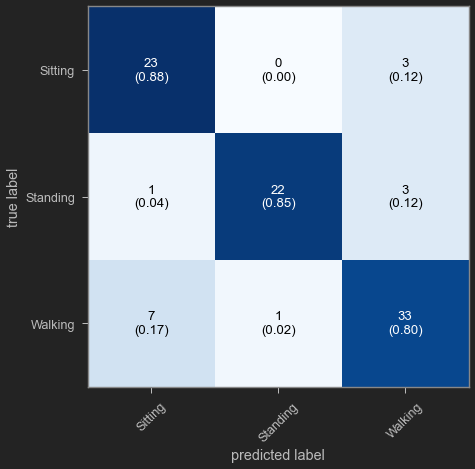

In [280]:
import seaborn as sns
mat = confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

In [281]:
score = model.evaluate(X_test, pred, verbose=0)
print("test loss, test acc:", score)

test loss, test acc: [0.08472447842359543, 1.0]
